# Game of Features

In [1]:
from pandas import read_csv as read
import pandas as pd
import random
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from plot import pltPRcurve, pltROCcurve 

In [2]:
def prep():
    X = data.loc[:, data.columns != 'isFraud'].values
    y = data.loc[:, 'isFraud'].values

    y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

    from sklearn.model_selection import train_test_split as train

    X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_estimators=110, n_jobs=-1)

    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)

    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]

    pltPRcurve(expected, predicted, preds, type(model).__name__)
    ##plt.show()
    ##pltROCcurve(expected, predicted, preds, type(model).__name__)

    
    report = metrics.classification_report(expected, predicted)
    conf_matrix = metrics.confusion_matrix(expected, predicted)

    print(type(model).__name__)
    print(report)
    print(conf_matrix)
    ##print(metrics.roc_auc_score(expected, preds))


In [3]:
path = "newFilt.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data = pd.get_dummies(data)

data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0
1,1,181.00,181.00,0.00,0.0,0.0,1,1,1,1,0,0,0,0,1,0,0,0,0,1
2,1,181.00,181.00,0.00,21182.0,0.0,1,1,1,1,0,0,0,0,1,0,1,0,0,0
3,1,9478.39,116494.00,107015.61,0.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0
4,1,3454.08,9031.96,5577.88,0.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0


f1=0.951 auc=0.997 ap=0.997
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23790
           1       0.99      0.91      0.95      4334

   micro avg       0.99      0.99      0.99     28124
   macro avg       0.99      0.95      0.97     28124
weighted avg       0.99      0.99      0.99     28124

[[23770    20]
 [  389  3945]]


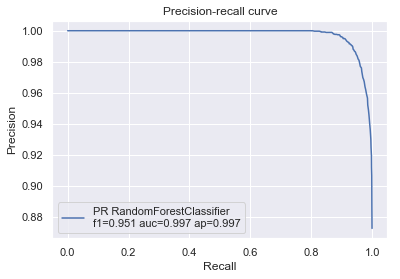

In [4]:
prep()
plt.savefig("PR-curve.png", dpi=300)

In [5]:
data.drop('newbalanceOrig', axis=1, inplace=True)
#data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)


In [6]:
data.head()

,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0
1,181.00,181.00,0.0,0.0,1,1,1,1,0,0,0,0,1,0,0,0,0,1
2,181.00,181.00,21182.0,0.0,1,1,1,1,0,0,0,0,1,0,1,0,0,0
3,9478.39,116494.00,0.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0
4,3454.08,9031.96,0.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0


f1=0.959 auc=0.998 ap=0.998
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23790
           1       0.99      0.93      0.96      4334

   micro avg       0.99      0.99      0.99     28124
   macro avg       0.99      0.96      0.98     28124
weighted avg       0.99      0.99      0.99     28124

[[23766    24]
 [  319  4015]]


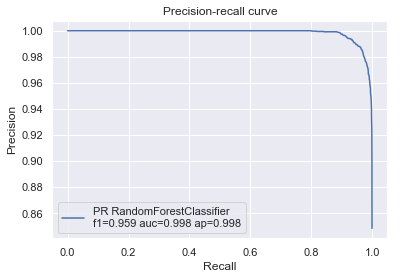

In [7]:
prep()


f1=0.964 auc=0.999 ap=0.999
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23790
           1       0.99      0.94      0.96      4334

   micro avg       0.99      0.99      0.99     28124
   macro avg       0.99      0.97      0.98     28124
weighted avg       0.99      0.99      0.99     28124

[[23762    28]
 [  278  4056]]


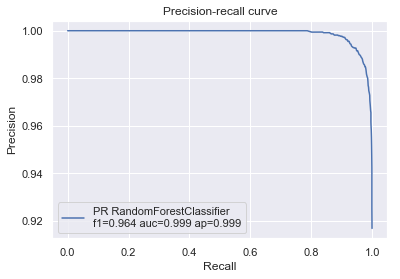

In [8]:
data.drop('oldbalanceDest', axis=1, inplace=True)
prep()

f1=0.964 auc=0.999 ap=0.999
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23790
           1       0.99      0.94      0.96      4334

   micro avg       0.99      0.99      0.99     28124
   macro avg       0.99      0.97      0.98     28124
weighted avg       0.99      0.99      0.99     28124

[[23762    28]
 [  277  4057]]


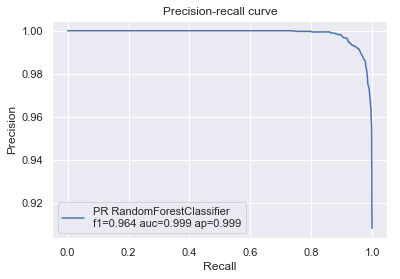

In [9]:
prep()

f1=0.969 auc=0.998 ap=0.998
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23790
           1       0.99      0.95      0.97      4334

   micro avg       0.99      0.99      0.99     28124
   macro avg       0.99      0.98      0.98     28124
weighted avg       0.99      0.99      0.99     28124

[[23734    56]
 [  205  4129]]


,amount,oldbalanceOrg,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0,1,1,1,1,0,0,0,0,0,0,0,1,0
1,181.00,181.00,1,1,1,1,0,0,0,0,1,0,0,0,0,1
2,181.00,181.00,1,1,1,1,0,0,0,0,1,0,1,0,0,0
3,9478.39,116494.00,0,1,1,1,1,0,0,0,0,0,0,0,1,0
4,3454.08,9031.96,0,1,1,1,1,0,0,0,0,0,0,0,1,0


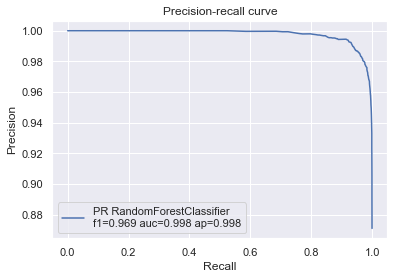

In [10]:
data.drop('newbalanceDest', axis=1, inplace=True)
prep()
data.head()

In [11]:
data.corr()

,amount,oldbalanceOrg,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
amount,1.000000,0.205667,0.346157,-0.081528,0.001350,-0.026341,-0.181568,0.002111,-0.001002,0.033480,0.119121,-0.054279,0.023805,-0.021563,-0.181568,0.304017
oldbalanceOrg,0.205667,1.000000,0.070277,-0.012752,0.001086,-0.053759,-0.190083,0.008077,-0.001170,0.036172,-0.299378,0.464094,-0.180977,-0.022039,-0.190083,-0.034110
isFraud,0.346157,0.070277,1.000000,-0.212034,0.001871,0.035525,-0.189924,-0.000383,-0.001478,-0.002724,0.220020,-0.142891,0.082316,-0.021918,-0.189924,0.340712
hour,-0.081528,-0.012752,-0.212034,1.000000,-0.003358,-0.007349,0.053131,-0.002751,0.001089,0.002095,-0.062185,0.022327,-0.019689,-0.004976,0.053131,-0.075162
newSender,0.001350,0.001086,0.001871,-0.003358,1.000000,0.003078,0.004512,0.000494,-0.789905,-0.001643,0.005377,-0.003201,-0.000551,0.000521,0.004512,-0.001815
newReceiver,-0.026341,-0.053759,0.035525,-0.007349,0.003078,1.000000,0.195419,-0.256098,-0.000518,-0.728641,-0.018265,-0.079805,-0.101021,-0.008383,0.195419,-0.029270
merchant,-0.181568,-0.190083,-0.189924,0.053131,0.004512,0.195419,1.000000,-0.050135,-0.003564,-0.142390,-0.113351,-0.344581,-0.507939,-0.052854,1.000000,-0.242270
fraudsEarly,0.002111,0.008077,-0.000383,-0.002751,0.000494,-0.256098,-0.050135,1.000000,-0.000390,0.193658,0.005702,0.017185,0.032106,0.001986,-0.050135,0.002377
LTS,-0.001002,-0.001170,-0.001478,0.001089,-0.789905,-0.000518,-0.003564,-0.000390,1.000000,0.000133,-0.002108,0.003712,0.001559,-0.000411,-0.003564,-0.001775
LTR,0.033480,0.036172,-0.002724,0.002095,-0.001643,-0.728641,-0.142390,0.193658,0.000133,1.000000,0.019275,0.052543,0.076151,0.010475,-0.142390,0.023555
